In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("outbreaks.csv")

In [3]:
df.shape

(15145, 12)

In [4]:
df.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,Unkown,NaN,Unkown,Unkown,Pending,20,0,0
1,1998,January,California,Unkown,Custard,NaN,Unkown,Unkown,Pending,112,0,0
2,1998,January,California,Restaurant,Unkown,NaN,Unkown,Unkown,Pending,35,0,0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,Unkown,Confirmed,4,0,0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3,0


In [5]:
col=df.columns.tolist()

In [6]:
col

['Year',
 'Month',
 'State',
 'Location',
 'Food',
 'Ingredient',
 'Species',
 'Serotype',
 'Status',
 'Illnesses',
 'Hospitalizations',
 'Fatalities']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15145 entries, 0 to 15144
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              15145 non-null  int64 
 1   Month             15145 non-null  object
 2   State             15145 non-null  object
 3   Location          15145 non-null  object
 4   Food              15145 non-null  object
 5   Ingredient        1670 non-null   object
 6   Species           15145 non-null  object
 7   Serotype          15145 non-null  object
 8   Status            15145 non-null  object
 9   Illnesses         15145 non-null  int64 
 10  Hospitalizations  15145 non-null  int64 
 11  Fatalities        15145 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1.4+ MB


In [8]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)

In [9]:
print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  ['Month', 'State', 'Location', 'Food', 'Ingredient', 'Species', 'Serotype', 'Status']
numerical variables:  ['Year', 'Illnesses', 'Hospitalizations', 'Fatalities']


In [10]:
df.nunique(axis=0)

Year                  18
Month                 12
State                 55
Location             152
Food                2638
Ingredient           359
Species              190
Serotype             221
Status                 4
Illnesses            279
Hospitalizations      60
Fatalities            11
dtype: int64

In [11]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  ['Month', 'State', 'Location', 'Food', 'Ingredient', 'Species', 'Serotype', 'Status']
numerical variables:  ['Year', 'Illnesses', 'Hospitalizations', 'Fatalities']


In [12]:
cats.extend(['Year'])
nums.remove('Year')

In [13]:
print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  ['Month', 'State', 'Location', 'Food', 'Ingredient', 'Species', 'Serotype', 'Status', 'Year']
numerical variables:  ['Illnesses', 'Hospitalizations', 'Fatalities']


In [14]:
df.isna()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype,Status,Illnesses,Hospitalizations,Fatalities
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
15140,False,False,False,False,False,True,False,False,False,False,False,False
15141,False,False,False,False,False,True,False,False,False,False,False,False
15142,False,False,False,False,False,True,False,False,False,False,False,False
15143,False,False,False,False,False,True,False,False,False,False,False,False


In [15]:
df.isna().sum()

Year                    0
Month                   0
State                   0
Location                0
Food                    0
Ingredient          13475
Species                 0
Serotype                0
Status                  0
Illnesses               0
Hospitalizations        0
Fatalities              0
dtype: int64

In [16]:
df.describe()

,Year,Illnesses,Hospitalizations,Fatalities
count,15145.000000,15145.000000,15145.000000,15145.000000
mean,2006.463915,19.567184,0.912644,0.020667
std,5.163815,47.526043,5.325507,0.381018
min,1998.000000,2.000000,0.000000,0.000000
25%,2002.000000,4.000000,0.000000,0.000000
50%,2006.000000,8.000000,0.000000,0.000000
75%,2011.000000,19.000000,0.000000,0.000000
max,2015.000000,1644.000000,308.000000,33.000000


In [17]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                      Year  Illnesses  Hospitalizations  Fatalities
Year              1.000000  -0.031677          0.022585    0.005229
Illnesses        -0.031677   1.000000          0.451003    0.103254
Hospitalizations  0.022585   0.451003          1.000000    0.423716
Fatalities        0.005229   0.103254          0.423716    1.000000


In [18]:
minValue = df['Illnesses'].min()
minValue

2

In [19]:
minValue2 = df['Hospitalizations'].min()
minValue2

0

In [20]:
minValue3 = df['Fatalities'].min()
minValue3

0

In [21]:
df.quantile(0.25)

C:\Users\Dilip\AppData\Local\Temp\ipykernel_6664\3656653379.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.25)


Year                2002.0
Illnesses              4.0
Hospitalizations       0.0
Fatalities             0.0
Name: 0.25, dtype: float64

In [22]:
df.quantile(0.5)

C:\Users\Dilip\AppData\Local\Temp\ipykernel_6664\1793688606.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.5)


Year                2006.0
Illnesses              8.0
Hospitalizations       0.0
Fatalities             0.0
Name: 0.5, dtype: float64

In [23]:
df.quantile(0.75)

C:\Users\Dilip\AppData\Local\Temp\ipykernel_6664\3799946287.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(0.75)


Year                2011.0
Illnesses             19.0
Hospitalizations       0.0
Fatalities             0.0
Name: 0.75, dtype: float64

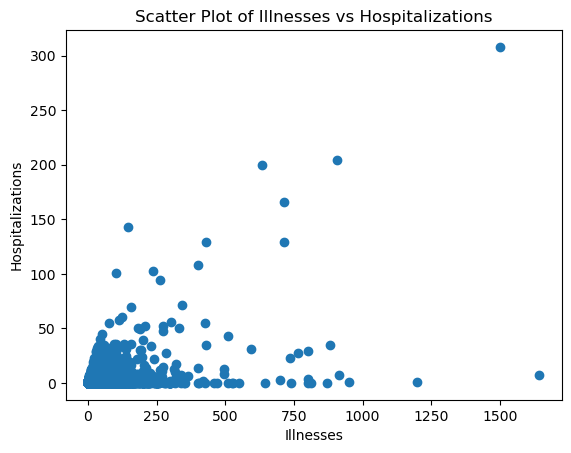

In [24]:
plt.scatter(df['Illnesses'], df['Hospitalizations'])
plt.xlabel('Illnesses')
plt.ylabel('Hospitalizations')
plt.title('Scatter Plot of Illnesses vs Hospitalizations')
plt.show()

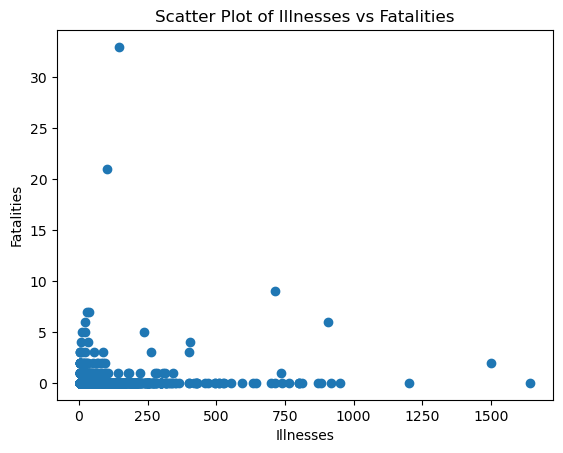

In [25]:
plt.scatter(df['Illnesses'], df['Fatalities'])
plt.xlabel('Illnesses')
plt.ylabel('Fatalities')
plt.title('Scatter Plot of Illnesses vs Fatalities')
plt.show()

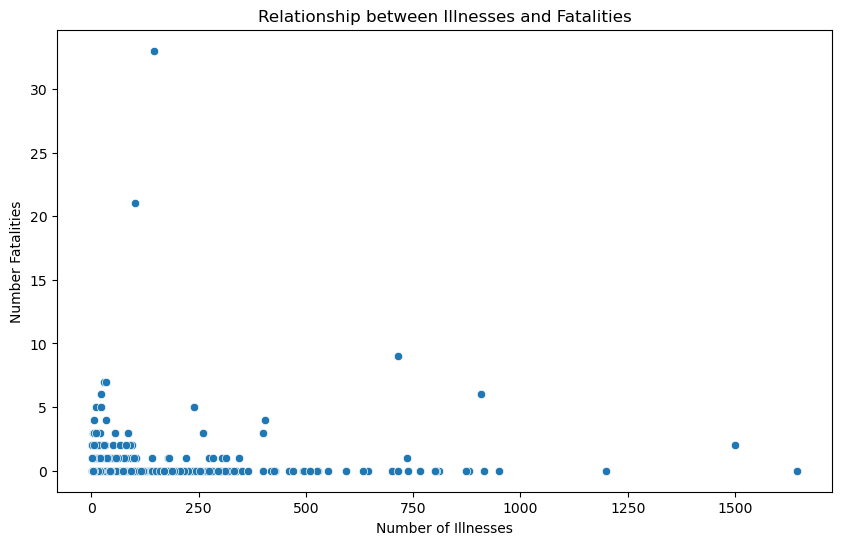

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Illnesses', y='Fatalities', data=df)
plt.title('Relationship between Illnesses and Fatalities')
plt.xlabel('Number of Illnesses')
plt.ylabel('Number Fatalities')
plt.show()

In [27]:
df['Species'].value_counts()

Unkown                                                           4701
Norovirus genogroup I                                            2187
Salmonella enterica                                              1943
Norovirus genogroup II                                           1332
Norovirus unknown                                                 714
                                                                 ... 
Salmonella enterica; Campylobacter jejuni; Campylobacter coli       1
Norovirus genogroup II; Adenovirus                                  1
Salmonella enterica; Norovirus genogroup I                          1
Campylobacter jejuni; Campylobacter other                           1
Shigella sonnei; Campylobacter jejuni                               1
Name: Species, Length: 190, dtype: int64

In [28]:
df['Ingredient'].value_counts()

Chicken                 163
Fin Fish                152
Beef                    100
Pork                    100
Egg                      98
                       ... 
Lettuce; Turkey           1
Mexican Style Cheese      1
Pepper, Ground            1
Carrots                   1
Zucchini                  1
Name: Ingredient, Length: 359, dtype: int64

In [29]:
df['Food'].value_counts()

Unkown                                    7472
Oysters, Raw                               129
Multiple Foods                             121
Salad, Unspecified                          91
Ground Beef, Hamburger                      70
                                          ... 
Pizza, Meat; Pizza, Vegetable                1
Salsa, Unspecified; Guacamole                1
Banana, Unspecified                          1
Pasta Salad; Chicken Salad; Tuna Salad       1
Cookies, Chocolate Chip                      1
Name: Food, Length: 2638, dtype: int64

In [30]:
status = df['Status'].value_counts()
status

Confirmed                  6952
Pending                    4701
Suspected                  3438
Confirmed and Suspected      54
Name: Status, dtype: int64

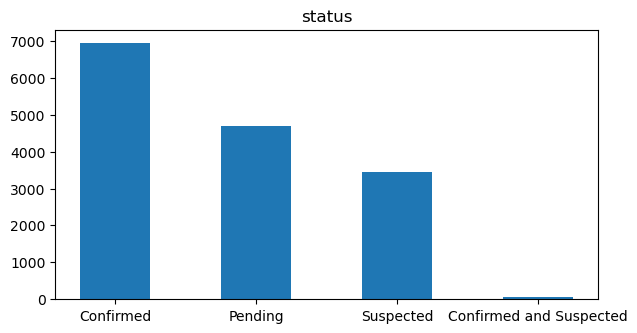

In [35]:
plt.figure(figsize=(7,3.5))
plt.title('status')
plt.bar(['Confirmed','Pending','Suspected','Confirmed and Suspected'],df['Status'].value_counts(),width=0.5)
plt.show()

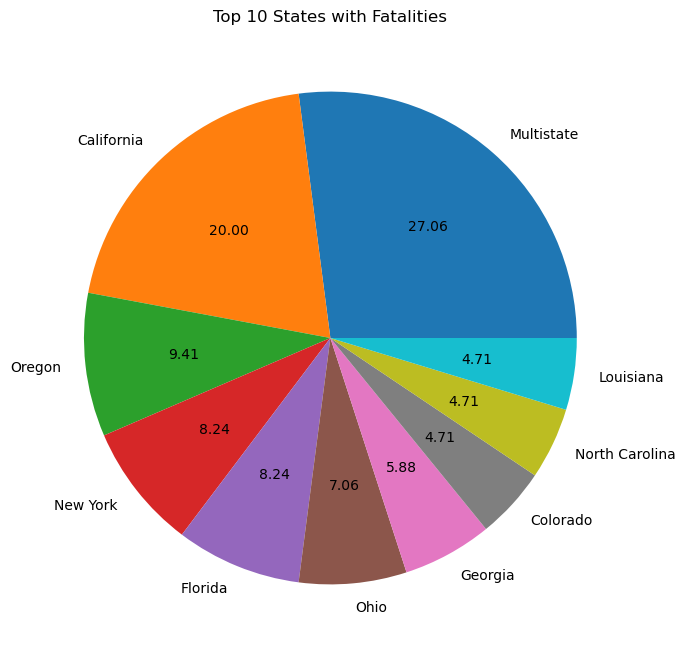

In [38]:
Fatalities = df[df['Fatalities']==1]
top_10_state = Fatalities['State'].value_counts()[:10]

plt.figure(figsize=(8, 8))
plt.title('Top 10 States with Fatalities')
plt.pie(top_10_state, autopct='%.2f', labels=top_10_state.index)
plt.show()
